In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
def inside_obstacle(point,obstacle):
    """
    returns 1 if the point is inside any obstacles
    0 otherwise
    """
    for obs in obstacle:
        if point[0]>obs[0][0] and point[0]<obs[0][2] and point[1]>obs[1][0] and point[1]<obs[1][2]:
            return 1
    return 0

def through_obstacle(line,obstacles):
    """
    returns 1 if the line goes through any obstacles
    0 otherwise
    """
    for i in range(10):
        if inside_obstacle((line[0]+(i*(line[2]-line[0])/10),line[1]+(i*(line[3]-line[1])/10)),obstacles)==1:
            return 1
    return 0

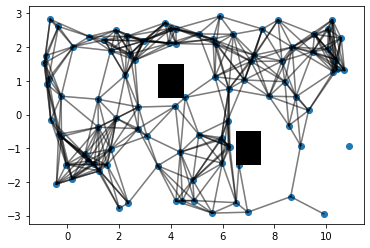

94


In [60]:
# ********************************************************************************* #
# LEARNING
# ********************************************************************************* #

# obstacle
obstacles=[[(3.5,4.5,4.5,3.5),(0.5,0.5,1.5,1.5)],
           [(6.5,7.5,7.5,6.5),(-1.5,-1.5,-0.5,-0.5)]]
xlimits=[-1,11]
ylimits=[-3,3]
for obs in obstacles:
    plt.fill(*obs,'k',alpha=1)

# samples
noofsamples=100
x=np.random.uniform(*xlimits,noofsamples)
y=np.random.uniform(*ylimits,noofsamples)
# x=(np.random.rand(200)*12)-1
# y=(np.random.rand(200)*6)-3

# eliminate samples inside obstacles
xindex=np.array([],dtype=int)
yindex=np.array([],dtype=int)
for i in range(len(x)):
    if inside_obstacle((x[i],y[i]),obstacles):
        xindex=np.append(xindex,i)
        yindex=np.append(yindex,i)
x=np.delete(x,xindex)
y=np.delete(y,yindex)

# plot
graph=[]
plt.scatter(x,y)
for i in range(len(x)):
    for j in range(len(y)):
        if np.sqrt((x[i]-x[j])**2+(y[i]-y[j])**2)<=1.75 and x[i]!=x[j] and y[i]!=y[j]:
            if through_obstacle((x[i],y[i],x[j],y[j]),obstacles)==0:
                plt.plot([x[i],x[j]],[y[i],y[j]],'k',alpha=0.3)
                graph.append([round(x[i],2),round(y[i],2),round(x[j],2),round(y[j],2)])
                pass
            pass

plt.show()

# String

g_dict={}
keys=[]
keys_str=[]
goal=[10,0]

for i in range(len(graph)):
    if str(graph[i][:2]) in g_dict.keys():
        g_dict[str(graph[i][:2])].append(str(graph[i][2:]))
        pass
    else:
        g_dict[str(graph[i][:2])]=[str(graph[i][2:])]
        keys.append(graph[i][:2])
        keys_str.append(str(graph[i][:2]))

for key in g_dict.keys():
    indx=keys_str.index(key)
    g_dict[key]=[g_dict[key]]
    g_dict[key].append([1]*len(g_dict[key][0]))
    g_dict[key].append(np.sqrt((keys[indx][0]-goal[0])**2+(keys[indx][1]-goal[1])**2))

graph=g_dict

print(len(keys))

In [11]:
# ********************************************************************************* #
# CREATE A GRAPH (UNDIRECTED)
# ********************************************************************************* #

# example
graph={"vstart" : [["A","B","C"],[1,1,1],0],
       "A" : [["D","E","F"],[1,1,3],3],
       "B" : [["G","H","I"],[4,1,2],2],
       "C" : [["J","K","L"],[1,1,1],3],
       "D" : [[],[],3],
       "E" : [["vgoal"],[3],1],
       "F" : [[],[],3],
       "G" : [["vgoal"],[3],2],
       "H" : [[],[],1],
       "I" : [["vgoal"],[3],2],
       "J" : [[],[],3],
       "K" : [["vgoal"],[2],2],
       "L" : [[],[],3],
       "vgoal" : [[],[],0]}



In [24]:
# ********************************************************************************* #
# APPLY DIJKSTRA'S
# ********************************************************************************* #

In [10]:
def pathcost(nodes):
    '''
    returns the path cost through the input nodes
    '''
    nodes.reverse()
    # print(nodes)
    length=0
    for i in range(len(nodes)-1):
        index=graph[nodes[i]][0].index(nodes[i+1])
        length=length+(graph[nodes[i]][1][index])
        pass
    return length

In [61]:
# algo=int(input("\nWhich algorithm do you want to implement: a*(1) or dijkstra's(2)?"))

start=[0,0]

goal=[10,0]

startmin=float('inf')
goalmin=float('inf')

for point in keys:
    startdist=np.sqrt((start[0]-point[0])**2+(start[1]-point[1])**2)
    if startdist<startmin:
        startmin=startdist
        startprm=str(point)
        pass
    goaldist=np.sqrt((goal[0]-point[0])**2+(goal[1]-point[1])**2)
    if goaldist<goalmin:
        goalmin=goaldist
        goalprm=str(point)
        pass

# starts with the start node
stack=[[0,startprm]]
C=[]
# update
final=startprm

t1=time.time()

iterations=0

while final!=goalprm and len(C)<len(graph):

    # add child nodes
    newstack=[]
    # print([graph[stack[0][1]][0],graph[stack[0][1]][1]])
    for child,cost in np.transpose([graph[stack[0][1]][0],graph[stack[0][1]][1]]):
        path=pathcost([child,*stack[0][1:]])
        newelement=[path+graph[child][2],child,*stack[0][1:]]
        # newelement=[path,child,*stack[0][1:]]
        newstack.append(newelement)
    
    # put first node in C list
    if stack[0][1] not in C:
        C.append(stack[0][1])

    # delete first node in stack
    stack.pop(0)

    # update the newstack with remaining stack elements
    for x in range(len(stack)):
        newstack.append(stack[x])
    stack=newstack

    # sort
    stack.sort()
    print(stack[0][0])
    final=stack[0][1]

    iterations+=1

    pass

t2=time.time()-t1
if final==goalprm:
    print("\nPath for A* is:",stack[0][1:],"\nThe cost is:",stack[0][0],"\nThe time taken is:",t2,"\nIterations:",iterations)
else:
    print("\nPath to Goal not found!!!")

9.79821004523079
9.243341770205241
8.825366941232115
8.945321020924728
8.814249598544908
8.844385516568284
8.885421470059587
9.098499725509324
9.117049914684056
9.262155327449282
8.825366941232115
8.945321020924728
8.814249598544908
8.844385516568284
8.885421470059587
9.098499725509324
9.117049914684056
9.264106002434742
9.264106002434742
9.323627536292236
8.876272901259302
8.690507060065283

Path for A* is: ['[9.32, 0.12]', '[8.4, 0.98]', '[6.84, 1.03]', '[6.19, -0.18]', '[5.09, -0.59]', '[4.18, 0.25]', '[2.75, -0.42]', '[1.21, -0.38]', '[-0.23, 0.54]'] 
The cost is: 8.690507060065283 
The time taken is: 0.015714406967163086 
Iterations: 22


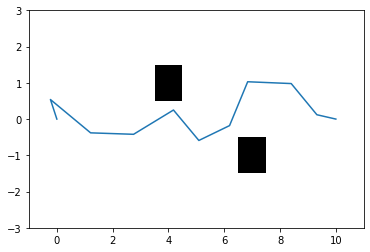

In [62]:
finalpath=[]
finalpath.append(goal)
for i in stack[0][1:]:
    for j in range(len(keys_str)):
        if i==keys_str[j]:
            finalpath.append(keys[j])
finalpath.append(start)
finalpath=np.transpose(finalpath)
plt.plot()
plt.plot(*finalpath)
for obs in obstacles:
    plt.fill(*obs,'k',alpha=1)
plt.xlim(*xlimits)
plt.ylim(*ylimits)
plt.show()